In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#create dataframe from csv
df = pd.read_csv('experiment-tracker.csv')
df.head()
#only keep columns we need, alpha,beta,n,HHI,pools, operators
df2 = df[['alpha','beta','n','HHI','#pools','#operators']]
df2.head()

,alpha,beta,n,HHI,#pools,#operators
0,1.0,2.0,1000,0.008711,338,265
1,1.0,1.9,1000,0.008952,344,265
2,1.0,1.8,1000,0.008543,350,265
3,1.0,1.7,1000,0.008696,361,265
4,1.0,1.6,1000,0.008541,372,265


In [16]:
#modifiy HHI value, with perfect value as 1/number of pools
df2['HHI_modified']=df2['HHI']*df2['n']
df2

/var/folders/lm/zht96hr15nv5fb41qdnbp_vh0000gn/T/ipykernel_30221/245504008.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['HHI_modified']=df2['HHI']*df2['n']


,alpha,beta,n,HHI,#pools,#operators,HHI_modified
0,1.0,2.0,1000,0.008711,338,265,8.711424
1,1.0,1.9,1000,0.008952,344,265,8.951594
2,1.0,1.8,1000,0.008543,350,265,8.543037
3,1.0,1.7,1000,0.008696,361,265,8.695817
4,1.0,1.6,1000,0.008541,372,265,8.540754
...,...,...,...,...,...,...,...
61,1.8,2.0,1000,0.018845,151,82,18.845151
62,1.8,1.8,1000,0.018968,167,82,18.968052
63,1.9,1.9,1000,0.020584,138,69,20.583911
64,1.9,2.0,1000,0.021054,132,69,21.054284


In [20]:
#create pivot table, alpha as index, beta as columns, HHI as values
pivot = pd.pivot_table(df2, index=['alpha'], columns=['beta'], values=['HHI_modified'])
pivot


HHI_modified                                                       \
beta           1.0       1.1       1.2        1.3        1.4        1.5   
alpha                                                                     
1.0       6.377551  8.424427  8.363798   8.323789   8.422410   8.455216   
1.1            NaN  7.928843  7.784837   7.796541   7.781982   7.810984   
1.2            NaN       NaN  8.669069   8.571437   8.630363   8.547726   
1.3            NaN       NaN       NaN  14.715804  14.060504  14.083930   
1.4            NaN       NaN       NaN        NaN  11.134068  11.206969   
1.5            NaN       NaN       NaN        NaN        NaN  12.692355   
1.6            NaN       NaN       NaN        NaN        NaN        NaN   
1.7            NaN       NaN       NaN        NaN        NaN        NaN   
1.8            NaN       NaN       NaN        NaN        NaN        NaN   
1.9            NaN       NaN       NaN        NaN        NaN        NaN   
2.0            NaN       NaN       NaN        NaN        NaN        NaN   

                                                              
beta         1.6        1.7        1.8        1.9        2.0  
alpha                                                         
1.0     8.540754   8.695817   8.543037   8.951594   8.711424  
1.1     7.808372   7.947740   8.094778   7.883107   8.185757  
1.2     8.559116   8.805505   8.633098   8.749779   8.955232  
1.3    14.259788  14.658499  14.795240  14.741598  14.722929  
1.4    11.223323  11.041242  11.178081  11.384287  11.143682  
1.5    12.689790  12.680215  13.112182  12.962761  13.497230  
1.6    41.874333  41.840105  41.865848  41.270773  41.386066  
1.7          NaN  14.429192  14.314275  14.108342  14.159598  
1.8          NaN        NaN  18.968052  19.047696  18.845151  
1.9          NaN        NaN        NaN  20.583911  21.054284  
2.0          NaN        NaN        NaN        NaN  21.289997

In [9]:
print(pivot)

            HHI                                                              \
beta        1.0       1.1       1.2       1.3       1.4       1.5       1.6   
alpha                                                                         
1.0    0.006378  0.008424  0.008364  0.008324  0.008422  0.008455  0.008541   
1.1         NaN  0.007929  0.007785  0.007797  0.007782  0.007811  0.007808   
1.2         NaN       NaN  0.008669  0.008571  0.008630  0.008548  0.008559   
1.3         NaN       NaN       NaN  0.014716  0.014061  0.014084  0.014260   
1.4         NaN       NaN       NaN       NaN  0.011134  0.011207  0.011223   
1.5         NaN       NaN       NaN       NaN       NaN  0.012692  0.012690   
1.6         NaN       NaN       NaN       NaN       NaN       NaN  0.041874   
1.7         NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1.8         NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1.9         NaN       NaN       NaN       NaN       

NameError: name 'xticks' is not defined

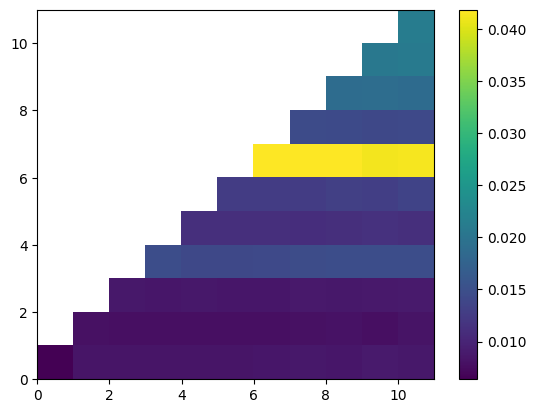

In [10]:

plt.imshow(pivot, cmap='viridis', interpolation='nearest', origin='lower',aspect='auto', extent=[0, len(pivot.columns), 0, len(pivot.index)])
plt.colorbar()

plt.xticks(xticks,pivot.columns)
plt.yticks(yticks,pivot.index)
plt.xlabel('alpha')
plt.ylabel('beta')
plt.title('HHI')
plt.show()

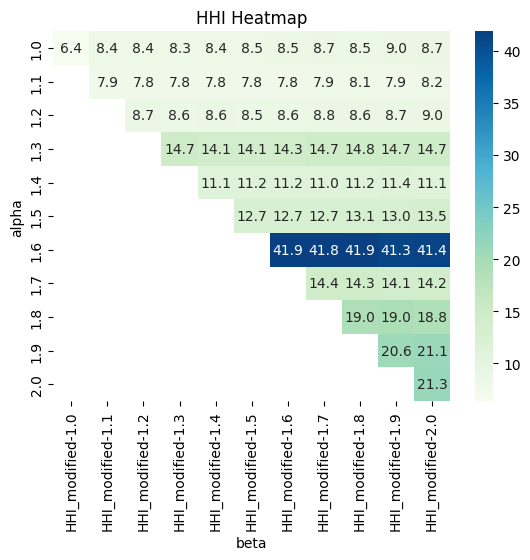

In [26]:
sns.heatmap(pivot, cmap='GnBu', annot=True, fmt=".1f")
plt.xlabel('beta')
plt.ylabel('alpha')
plt.title('HHI Heatmap')
plt.show()

In [12]:
n=1000
print((1/n**2)*n)

0.001


In [ ]:
import sympy as sp

# 定义符号变量和未知数
m = sp.symbols('m')
equation1 = 2 * m + 3
equation2 = m**2 - 5

# 解方程 equation1 = equation2
solution = sp.solve(sp.Eq(equation1, equation2), m)
print("Solution:", solution)

In [5]:
import sympy as sp
m,R,T,i,p,a,l,c = sp.symbols('m R T i p a l c')

operator_utility = R/T*(p*a+(1-p)*a*m+p*i*l*a)-c
delegator_utility = R/T*(1+i)*p*(1-m+l)

solution=sp.solve(sp.Eq(operator_utility,delegator_utility),m)
print(solution)

[(-R*a*i*l*p - R*a*p + R*i*l*p + R*i*p + R*l*p + R*p + T*c)/(R*(-a*p + a + i*p + p))]


In [6]:
m,R,T,i,p,a,l,c,y = sp.symbols('m R T i p a l c y')

solo_utility=R/T*a-c
liquid_utility=R*T*(a+a*m+(1-p)*a*i*l*p**(-1))-c-(1-1/p)*c*y

solution = sp.solve(sp.Eq(solo_utility,liquid_utility),m)
print(solution)

[i*l - i*l/p - 1 + T**(-2) + c*y/(R*T*a) - c*y/(R*T*a*p)]


In [7]:
# import CSV file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#create dataframe from csv
df = pd.read_csv('247-n-100-beta-2-alpha-1-stake_distr_source-pareto-agent_profile-hard/final-state-pools-247-n-100-beta-2-alpha-1-stake_distr_source-pareto-agent_profile-hard.csv')
df.head()

,Pool id,Owner id,Type,Stake,Pool Pledge,Owner cost,Pool cost,Pool margin,Delegator Id,Insurance
0,1404,2,solo,0.02,0.020,0.000465,0.000465,0.000000,[],0.000
1,1840,4,liquid,0.02,0.005,0.000246,0.000246,0.262360,"[34, 44]",0.001
2,1330,7,solo,0.02,0.020,0.000404,0.000404,0.000000,[],0.000
3,948,9,liquid,0.02,0.005,0.000655,0.000458,0.061972,"[21, 71, 58, 52]",0.001
4,949,9,liquid,0.02,0.005,0.000655,0.000458,0.061972,"[71, 70]",0.001


In [9]:
#sume the value of stake column
df['Pool Pledge'].sum()

0.525928489419053

In [16]:
df2=pd.read_csv('250-n-100-beta-2-alpha-1-stake_distr_source-pareto-agent_profile-hard/final-state-stakeholders-250-n-100-beta-2-alpha-1-stake_distr_source-pareto-agent_profile-hard.csv')

In [17]:
df2.head()

,Agent id,Initial stake,Cost,Status,Pools owned,Total pool stake,Total pledge,Total delegation
0,0,0.006745,0.000210,Operator,1,0.02,0.005,0.000745
1,1,0.007143,0.000332,Delegator,0,0.00,0.000,0.019143
2,2,0.010240,0.000465,Operator,1,0.02,0.020,0.002240
3,3,0.009598,0.000972,Delegator,0,0.00,0.000,0.021598
4,4,0.007463,0.000246,Delegator,0,0.00,0.000,0.013463


In [18]:
df2['Initial stake'].sum()

1.0000000000000009

In [19]:
df2["Total pool stake"].sum()

1.410733976954766

In [20]:
df2["Total delegation"].sum()

0.8849999999999961

In [21]:
df2["Total pledge"].sum()

0.5257339769547662

In [23]:
#find agents where their pledge+delegation is not equal to their stake
df2[df2['Initial stake'] != df2['Total delegation']+df2['Total pledge']]


,Agent id,Initial stake,Cost,Status,Pools owned,Total pool stake,Total pledge,Total delegation
0,0,0.006745,0.000210,Operator,1,0.02,0.005,0.000745
1,1,0.007143,0.000332,Delegator,0,0.00,0.000,0.019143
2,2,0.010240,0.000465,Operator,1,0.02,0.020,0.002240
3,3,0.009598,0.000972,Delegator,0,0.00,0.000,0.021598
4,4,0.007463,0.000246,Delegator,0,0.00,0.000,0.013463
...,...,...,...,...,...,...,...,...
95,95,0.006747,0.000913,Delegator,0,0.00,0.000,0.012747
96,96,0.007107,0.000879,Operator,1,0.02,0.005,0.001107
97,97,0.007104,0.000346,Operator,1,0.02,0.005,0.001104
98,98,0.033387,0.000816,Operator,6,0.12,0.030,0.000000


In [28]:
#find agents where their pledge+delegation is not equal to initial stake and beging a delegator
df3=df2[(df2['Initial stake'] != df2['Total delegation']+df2['Total pledge']) & (df2['Total delegation']!=0)]
#find agents where status is delegator in df3
df3[df3['Status']=='Delegator']

,Agent id,Initial stake,Cost,Status,Pools owned,Total pool stake,Total pledge,Total delegation
1,1,0.007143,0.000332,Delegator,0,0.0,0.0,0.019143
3,3,0.009598,0.000972,Delegator,0,0.0,0.0,0.021598
4,4,0.007463,0.000246,Delegator,0,0.0,0.0,0.013463
5,5,0.005862,0.000872,Delegator,0,0.0,0.0,0.005862
9,9,0.013313,0.000655,Delegator,0,0.0,0.0,0.013313
11,11,0.007991,0.000470,Delegator,0,0.0,0.0,0.013991
13,13,0.008055,0.000934,Delegator,0,0.0,0.0,0.014055
14,14,0.005661,0.000744,Delegator,0,0.0,0.0,0.005661
16,16,0.009064,0.000818,Delegator,0,0.0,0.0,0.013134
18,18,0.006246,0.000571,Delegator,0,0.0,0.0,0.012246


In [58]:
baseline_metrix_df = pd.read_csv('304-n-1000-beta-2.0-alpha-1.0-stake_distr_source-pareto-agent_profile-hard/metrics.csv')
baseline_metrix_df.head()

,Round,Pool count,Total delegated stake,Total pool stake,Total insurance,Operator count,Average pools per operator,Nakamoto coefficient,HHI,Gini-agent stake coefficient,Total cost
0,0,"{'solo': 0, 'liquid': 0, 'total': 0}",0.000000,"{'solo': 0, 'liquid': 0, 'total': 0}",0.00000,"{'solo': 0, 'liquid': 0, 'total': 0}",0.000000,0,0.000000,-1.000000,"{'solo': 0, 'liquid': 0, 'total': 0}"
1,1,"{'solo': 39, 'liquid': 247, 'total': 286}",0.370061,"{'solo': 0.06284643735510681, 'liquid': 0.4935...",0.01235,"{'solo': 39, 'liquid': 141, 'total': 180}",1.588889,70,0.006270,0.181701,"{'solo': 0.021096629694432028, 'liquid': 0.082..."
2,2,"{'solo': 70, 'liquid': 240, 'total': 310}",0.359888,"{'solo': 0.12361932531772982, 'liquid': 0.4798...",0.01200,"{'solo': 70, 'liquid': 115, 'total': 164}",1.890244,54,0.007541,0.262962,"{'solo': 0.04314284569356661, 'liquid': 0.0699..."
3,3,"{'solo': 87, 'liquid': 244, 'total': 331}",0.361500,"{'solo': 0.15549828289036602, 'liquid': 0.4835...",0.01220,"{'solo': 81, 'liquid': 110, 'total': 172}",1.924419,52,0.007585,0.291024,"{'solo': 0.05658636407419043, 'liquid': 0.0658..."
4,4,"{'solo': 95, 'liquid': 247, 'total': 342}",0.370500,"{'solo': 0.17590452406191984, 'liquid': 0.4940...",0.01235,"{'solo': 88, 'liquid': 111, 'total': 182}",1.879121,53,0.007458,0.299235,"{'solo': 0.06337553121395109, 'liquid': 0.0635..."


In [31]:
liquidity03_metrix_df = pd.read_csv('326-n-1000-beta-2.0-alpha-1.0-stake_distr_source-pareto-agent_profile-hard/metrics.csv')

In [32]:
#create new df with only the columns we need, Average pools per operator in two database
df4 = baseline_metrix_df[['Average pools per operator']]
df5 = liquidity03_metrix_df[['Average pools per operator']]
#combine two df
df6 = pd.concat([df4, df5], axis=1)
df6.columns = ['Liquidity=0.1', 'Liquidity=0.3']

In [65]:
df6=baseline_metrix_df[['Total cost']]
df7=liquidity03_metrix_df[['Total cost']]
df8 = pd.concat([df6, df7], axis=1)
df8.columns = ['Liquidity=0.1', 'Liquidity=0.3']
df8 =df8.fillna(method='ffill')
equilibrium=df8.iloc[-1]

In [48]:
df6.head()
#fill the missing value with the last value in the column
df6 = df6.fillna(method='ffill')
#find the last value of the column
equilibrium=df6.iloc[-1]

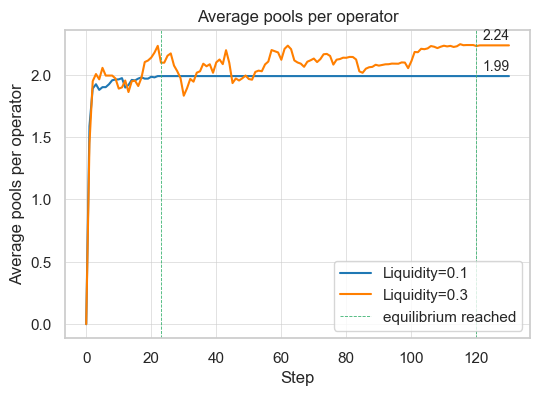

In [63]:
#increase the dpi to 300
sns.set(style="whitegrid")  # 设置 Seaborn 样式
sns.set_context("notebook", rc={"grid.linewidth": 0.4, "grid.alpha": 0.4,"grid.dashes": (1, 1)})  # 调整网格样式和间距
color=sns.color_palette('Paired')
equilibrium_colour = 'mediumseagreen'

#do not use dashes line 
fig = plt.figure(figsize=(6, 4))

sns.lineplot(x=df6['Liquidity=0.1'].index,y=df6['Liquidity=0.1'],label='Liquidity=0.1',color=color[1])
sns.lineplot(x=df6['Liquidity=0.3'].index,y=df6['Liquidity=0.3'],label='Liquidity=0.3',color=color[7])
plt.text(len(df6['Liquidity=0.1']) - 9,equilibrium[0] * (1 + 0.02), f'{equilibrium[0]:.2f}', fontsize=10)
plt.text(len(df6['Liquidity=0.3']) - 9,equilibrium[1] * (1 + 0.02), f'{equilibrium[1]:.2f}', fontsize=10)   
plt.axvline(x=23, label="equilibrium reached", c=equilibrium_colour, linestyle='--',linewidth=0.6)    
plt.axvline(x=120, c=equilibrium_colour, linestyle='--',linewidth=0.6) 

plt.xlabel('Step')
plt.ylabel('Average pools per operator')
plt.title('Average pools per operator')
plt.legend(loc='lower right')
plt.savefig('Average_pools_per_operator_liquidity.png',dpi=300)
plt.show()

In [ ]:
def plot_line_sns(data, execution_id, color, x_label, y_label, filename, equilibrium_steps, pivot_steps,
              path, title='', show_equilibrium=False):
    sns.set(style="whitegrid")  # 设置 Seaborn 样式
    sns.set_context("notebook", rc={"grid.linewidth": 0.4, "grid.alpha": 0.4,"grid.dashes": (1, 1)})  # 调整网格样式和间距
    equilibrium_colour = 'mediumseagreen'
    pivot_colour = 'gold'
    color=sns.color_palette('Paired')[color]

    fig = plt.figure(figsize=(6, 4))
    sns.lineplot(data=data, color=color,label=y_label)
    plt.scatter(x=1, y=data.iloc[1], color=color, marker='o')
    plt.text(1,data.iloc[1]*(1+0.04),f'{data.iloc[1]:.2f}',fontsize=10)
    
    if show_equilibrium:
        for i, step in enumerate(equilibrium_steps):
            label = "Equilibrium reached at step "+str(step) if i == 0 else ""
            plt.axvline(x=step, label=label, c=equilibrium_colour)
    for i, step in enumerate(pivot_steps):
        label = "Parameter change" if i == 0 else ""
        plt.plot(step, data[step], 'x', label=label, c=pivot_colour)
    equilibrium_value = data.iloc[-1]
    label_text = f'value: {equilibrium_value:.2f}'
    plt.text(data.index[-1] - 8, equilibrium_value * (1 + 0.04), label_text, color='black', fontsize=10)

    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.ylim(0,max(data)*1.2) 
    plt.legend(loc='lower right')
    filename = execution_id + "-" + filename + ".png"
    plt.savefig(path / filename, bbox_inches='tight',dpi=300)
    plt.close(fig)

TypeError: can't multiply sequence by non-int of type 'float'

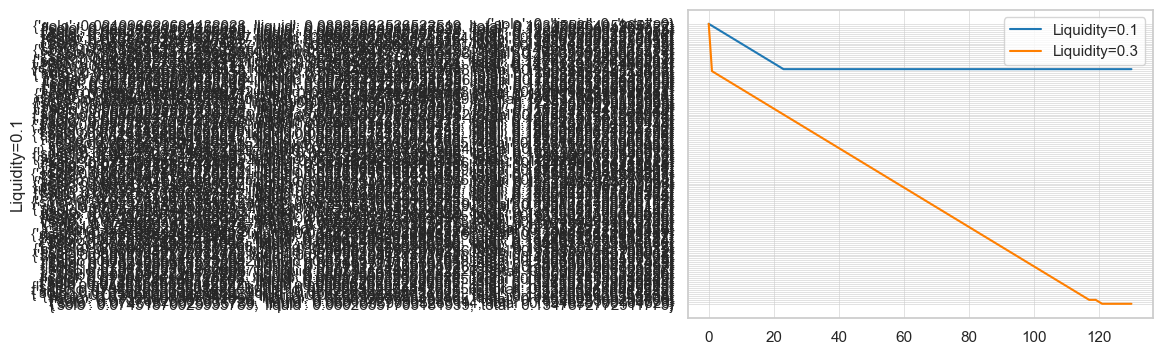

In [66]:
#increase the dpi to 300
sns.set(style="whitegrid")  # 设置 Seaborn 样式
sns.set_context("notebook", rc={"grid.linewidth": 0.4, "grid.alpha": 0.4,"grid.dashes": (1, 1)})  # 调整网格样式和间距
color=sns.color_palette('Paired')
equilibrium_colour = 'mediumseagreen'

#do not use dashes line 
fig = plt.figure(figsize=(6, 4))

sns.lineplot(x=df8['Liquidity=0.1'].index,y=df8['Liquidity=0.1'],label='Liquidity=0.1',color=color[1])
sns.lineplot(x=df8['Liquidity=0.3'].index,y=df8['Liquidity=0.3'],label='Liquidity=0.3',color=color[7])
plt.text(len(df8['Liquidity=0.1']) - 9,equilibrium[0] * (1 + 0.02), f'{equilibrium[0]:.2f}', fontsize=10)
plt.text(len(df8['Liquidity=0.3']) - 9,equilibrium[1] * (1 + 0.02), f'{equilibrium[1]:.2f}', fontsize=10)   
plt.axvline(x=23, label="equilibrium reached", c=equilibrium_colour, linestyle='--',linewidth=0.6)    
plt.axvline(x=120, c=equilibrium_colour, linestyle='--',linewidth=0.6) 

plt.xlabel('Step')
plt.ylabel('Total cost')
plt.title('Total cost')
plt.legend(loc='lower right')
plt.savefig('Average_pools_per_operator_liquidity.png',dpi=300)
plt.show()

In [78]:
def plot_sns_with_dataframe(df1,df2,label1,label2,metrix,title):
    df1_1=df1[[metrix]]
    df2_1=df2[[metrix]]
    equilibrium_steps=[df1_1.index[-1]-10,df2_1.index[-1]-10] # the step where equilibrium reached
    df = pd.concat([df1_1, df2_1], axis=1)
    df.columns = [label1,label2]
    df =df.fillna(method='ffill')
    equilibrium=df.iloc[-1]
    
    sns.set(style="whitegrid")  # 设置 Seaborn 样式
    sns.set_context("notebook", rc={"grid.linewidth": 0.4, "grid.alpha": 0.4,"grid.dashes": (1, 1)})  # 调整网格样式和间距
    color=sns.color_palette('Paired')
    equilibrium_colour = 'mediumseagreen'
    fig = plt.figure(figsize=(6, 4))

    #plot two lines
    sns.lineplot(x=df[label1].index,y=df[label1],label=label1,color=color[1])
    sns.lineplot(x=df[label2].index,y=df[label2],label=label2,color=color[7])
    #plot the value of equilibrium
    plt.text(len(df[label1]) - 9,equilibrium[0] * (1 + 0.02), f'{equilibrium[0]:.2f}', fontsize=10)
    plt.text(len(df[label2]) - 9,equilibrium[1] * (1 + 0.02), f'{equilibrium[1]:.2f}', fontsize=10)
    #plot the equilibrium reached step
    plt.axvline(x=equilibrium_steps[0], label="equilibrium reached", c=equilibrium_colour, linestyle='--',linewidth=0.6)
    plt.axvline(x=equilibrium_steps[1], c=equilibrium_colour, linestyle='--',linewidth=0.6)

    plt.xlabel('Step')
    plt.ylabel(metrix)
    plt.title(metrix)
    plt.legend(loc='lower right')
    plt.savefig(title+'.png',dpi=300)
    plt.show()

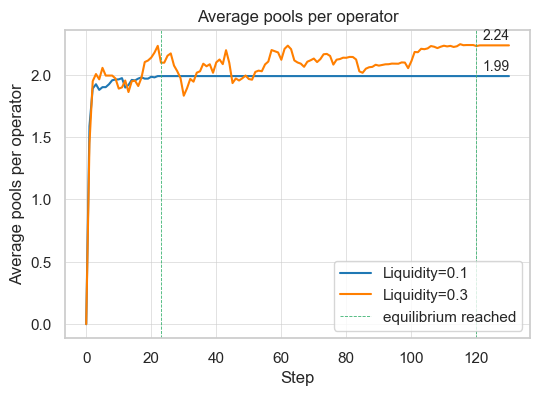

In [79]:
baseline_metrix_df = pd.read_csv('304-n-1000-beta-2.0-alpha-1.0-stake_distr_source-pareto-agent_profile-hard/metrics.csv')
liquidity03_metrix_df = pd.read_csv('326-n-1000-beta-2.0-alpha-1.0-stake_distr_source-pareto-agent_profile-hard/metrics.csv')

plot_sns_with_dataframe(baseline_metrix_df,liquidity03_metrix_df,'Liquidity=0.1','Liquidity=0.3','Average pools per operator','Average pools per operator liquidity')


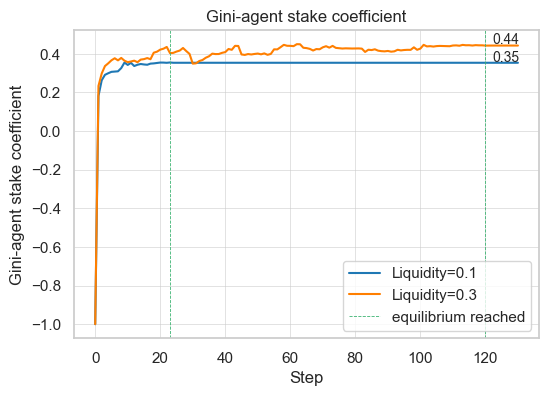

In [81]:
plot_sns_with_dataframe(baseline_metrix_df,liquidity03_metrix_df,'Liquidity=0.1','Liquidity=0.3','Gini-agent stake coefficient','Gini-agent stake coefficient liquidity')


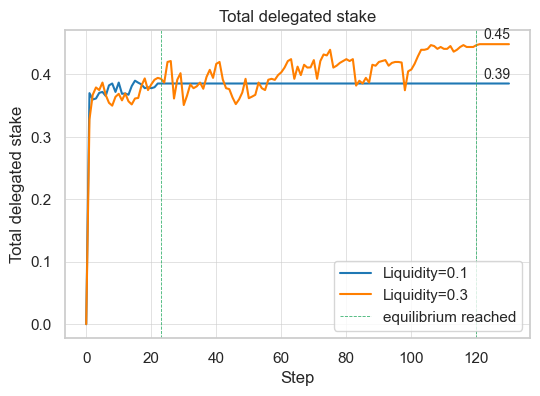

In [83]:
plot_sns_with_dataframe(baseline_metrix_df,liquidity03_metrix_df,'Liquidity=0.1','Liquidity=0.3','Total delegated stake','Total delegated stake liquidity')

In [92]:
def plot_sns_with_dataframe_three(df1,df2,df3,label1,label2,label3,metrix,title):
    df1_1=df1[[metrix]]
    df2_1=df2[[metrix]]
    df3_1=df3[[metrix]]
    equilibrium_steps=[df1_1.index[-1]-10,df2_1.index[-1]-10,df3_1.index[-1]-10] # the step where equilibrium reached
    df = pd.concat([df1_1, df2_1,df3_1], axis=1)
    df.columns = [label1,label2,label3]
    df =df.fillna(method='ffill')
    equilibrium=df.iloc[-1]
    
    sns.set(style="whitegrid")  # 设置 Seaborn 样式
    sns.set_context("notebook", rc={"grid.linewidth": 0.4, "grid.alpha": 0.4,"grid.dashes": (1, 1)})  # 调整网格样式和间距
    color=sns.color_palette('Paired')
    equilibrium_colour = 'mediumseagreen'
    fig = plt.figure(figsize=(6, 4))

    #plot two lines
    sns.lineplot(x=df[label1].index,y=df[label1],label=label1,color=color[1])
    sns.lineplot(x=df[label2].index,y=df[label2],label=label2,color=color[7])
    sns.lineplot(x=df[label3].index,y=df[label3],label=label3,color=color[5])
    #plot the value of equilibrium
    plt.text(len(df[label1]) - 9,equilibrium[0] * (1 + 0.02), f'{equilibrium[0]:.2f}', fontsize=10)
    plt.text(len(df[label2]) - 9,equilibrium[1] * (1 + 0.02), f'{equilibrium[1]:.2f}', fontsize=10)
    plt.text(len(df[label3]) - 9,equilibrium[2] * (1 + 0.02), f'{equilibrium[2]:.2f}', fontsize=10)
    #plot the equilibrium reached step
    plt.axvline(x=equilibrium_steps[0], label="equilibrium reached", c=equilibrium_colour, linestyle='--',linewidth=0.6)
    plt.axvline(x=equilibrium_steps[1], c=equilibrium_colour, linestyle='--',linewidth=0.6)
    plt.axvline(x=equilibrium_steps[2], c=equilibrium_colour, linestyle='--',linewidth=0.6)

    plt.xlabel('Step')
    plt.ylabel(metrix)
    plt.title(metrix)
    plt.legend(loc='lower right')
    plt.savefig(title+'.png',dpi=300)
    plt.show()

In [86]:
df_hard=pd.read_csv('304-n-1000-beta-2.0-alpha-1.0-stake_distr_source-pareto-agent_profile-hard/metrics.csv')
df_solo=pd.read_csv('341-n-1000-beta-2-alpha-1-stake_distr_source-pareto-agent_profile-solo/metrics.csv')
df_easy=pd.read_csv('340-n-1000-beta-2-alpha-1-stake_distr_source-pareto-agent_profile-easy/metrics.csv')

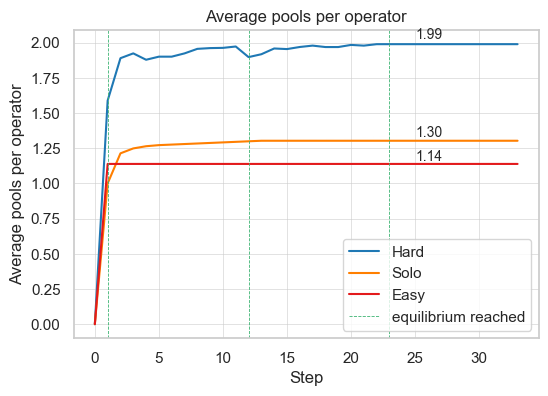

In [93]:
plot_sns_with_dataframe_three(df_hard,df_solo,df_easy,'Hard','Solo','Easy','Average pools per operator','Average pools per operator profile')

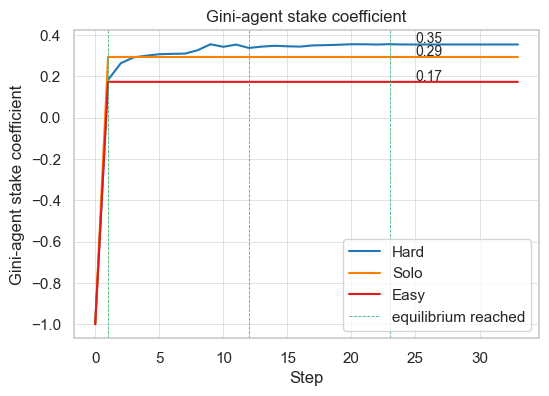

In [94]:
plot_sns_with_dataframe_three(df_hard,df_solo,df_easy,'Hard','Solo','Easy','Gini-agent stake coefficient','Gini-agent stake coefficient profile')

In [16]:
def select_key(df,key,column):
    df2=[]
    for item in df[column]:
        item=eval(item)[key]
        df2.append(item)
    df2=pd.DataFrame(df2)
    return df2

def plot_sns_with_dataframe_three_dict(df1,df2,df3,label1,label2,label3,metrix,title):
    #select the key == total in dict value
    df1_1=select_key(df=df1,key='total',column=metrix)
    df2_1=select_key(df=df2,key='total',column=metrix)
    df3_1=select_key(df=df3,key='total',column=metrix)
    equilibrium_steps=[df1_1.index[-1]-10,df2_1.index[-1]-10,df3_1.index[-1]-10] # the step where equilibrium reached
    df = pd.concat([df1_1, df2_1,df3_1], axis=1)
    df.columns = [label1,label2,label3]
    df =df.fillna(method='ffill')
    equilibrium=df.iloc[-1]
    
    sns.set(style="whitegrid")  # 设置 Seaborn 样式
    sns.set_context("notebook", rc={"grid.linewidth": 0.4, "grid.alpha": 0.4,"grid.dashes": (1, 1)})  # 调整网格样式和间距
    color=sns.color_palette('Paired')
    equilibrium_colour = 'mediumseagreen'
    fig = plt.figure(figsize=(6, 4))

    #plot two lines
    sns.lineplot(x=df[label1].index,y=df[label1],label=label1,color=color[1])
    sns.lineplot(x=df[label2].index,y=df[label2],label=label2,color=color[7])
    sns.lineplot(x=df[label3].index,y=df[label3],label=label3,color=color[5])
    #plot the value of equilibrium
    plt.text(len(df[label1]) - 9,equilibrium[0] * (1 + 0.02), f'{equilibrium[0]:.2f}', fontsize=10)
    plt.text(len(df[label2]) - 9,equilibrium[1] * (1 + 0.02), f'{equilibrium[1]:.2f}', fontsize=10)
    plt.text(len(df[label3]) - 9,equilibrium[2] * (1 + 0.02), f'{equilibrium[2]:.2f}', fontsize=10)
    #plot the equilibrium reached step
    plt.axvline(x=equilibrium_steps[0], label="equilibrium reached", c=equilibrium_colour, linestyle='--',linewidth=0.6)
    plt.axvline(x=equilibrium_steps[1], c=equilibrium_colour, linestyle='--',linewidth=0.6)
    plt.axvline(x=equilibrium_steps[2], c=equilibrium_colour, linestyle='--',linewidth=0.6)

    plt.xlabel('Step')
    plt.ylabel(metrix)
    plt.title(metrix)
    plt.legend(loc='lower right')
    plt.savefig(title+'.png',dpi=300)
    plt.show()

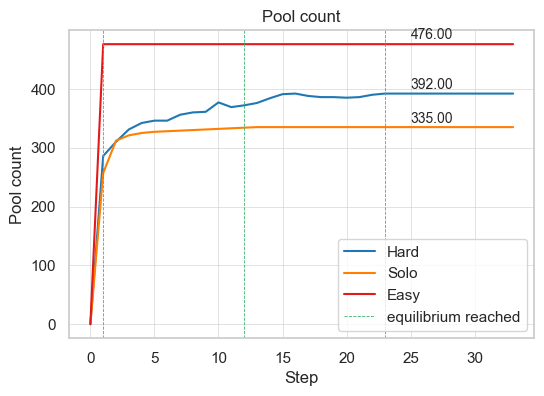

In [138]:
plot_sns_with_dataframe_three_dict(df_hard,df_solo,df_easy,'Hard','Solo','Easy','Pool count','Pool count stake profile')

In [ ]:
def select_key(df,key,column):
    df2=[]
    for item in df[column]:
        item=eval(item)[key]
        df2.append(item)
    df2=pd.DataFrame(df2)
    return df2

select_key(df=df_hard,key='total',column='Total delegated stake')

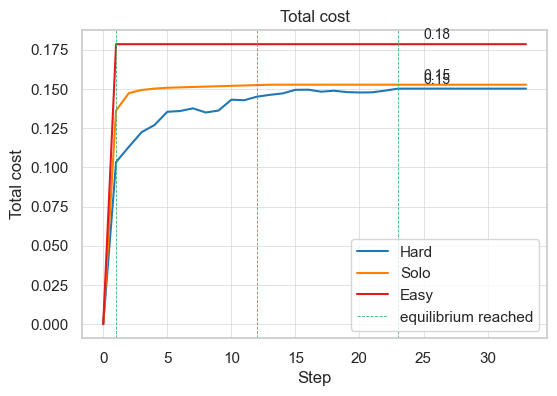

In [139]:
plot_sns_with_dataframe_three_dict(df_hard,df_solo,df_easy,'Hard','Solo','Easy','Total cost','Total cost stake profile')

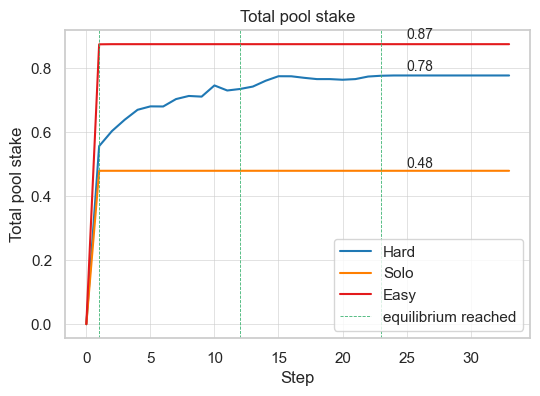

In [140]:
plot_sns_with_dataframe_three_dict(df_hard,df_solo,df_easy,'Hard','Solo','Easy','Total pool stake','Total pool stake stake profile')

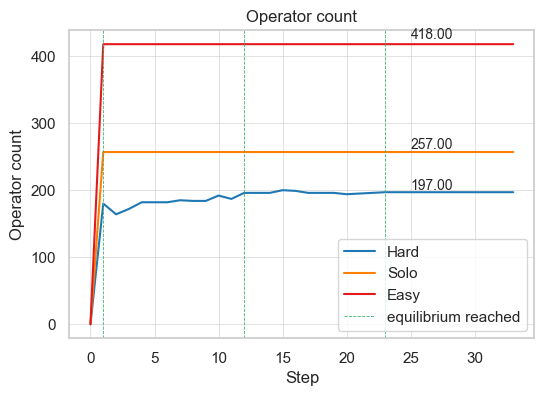

In [141]:
plot_sns_with_dataframe_three_dict(df_hard,df_solo,df_easy,'Hard','Solo','Easy','Operator count','Operator count profile')

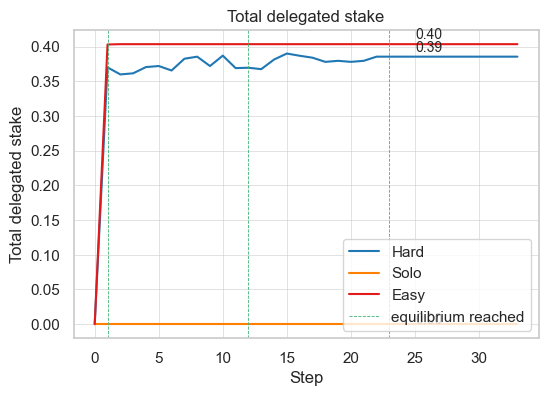

In [142]:
plot_sns_with_dataframe_three(df_hard,df_solo,df_easy,'Hard','Solo','Easy','Total delegated stake','Total delegated stake profile')

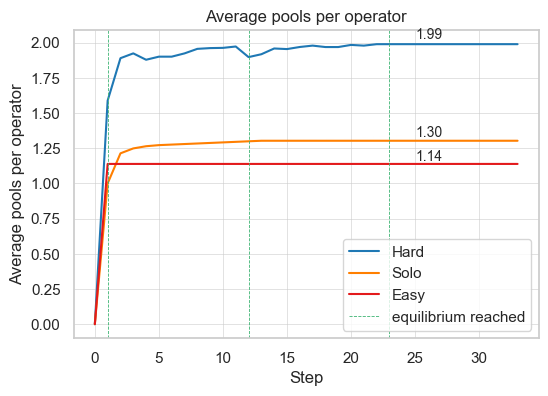

In [143]:
plot_sns_with_dataframe_three(df_hard,df_solo,df_easy,'Hard','Solo','Easy','Average pools per operator','Average pools per operator profile')

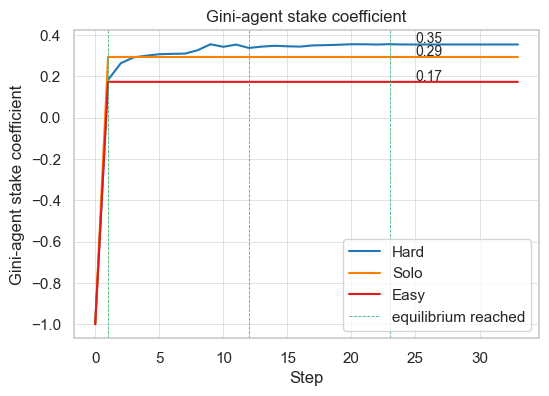

In [144]:
plot_sns_with_dataframe_three(df_hard,df_solo,df_easy,'Hard','Solo','Easy','Gini-agent stake coefficient','Gini-agent stake coefficient profile')

In [146]:
pd_hard_pool=pd.read_csv('304-n-1000-beta-2.0-alpha-1.0-stake_distr_source-pareto-agent_profile-hard/final-state-pools-304-n-1000-beta-2.0-alpha-1.0-stake_distr_source-pareto-agent_profile-hard.csv')
pd_hard_pool.head()

,Pool id,Owner id,Type,Stake,Pool Pledge,Owner cost,Pool cost,Pool margin,Delegator Id,Insurance
0,6214,9,solo,0.002,0.0020,0.000655,0.000655,0.00000,[],0.00000
1,6696,12,solo,0.002,0.0020,0.000946,0.000946,0.00000,[],0.00000
2,4151,15,solo,0.002,0.0020,0.000118,0.000118,0.00000,[],0.00000
3,5393,17,solo,0.002,0.0020,0.000911,0.000911,0.00000,[],0.00000
4,3529,20,liquid,0.002,0.0005,0.000263,0.000137,0.03557,"[295, 240, 941]",0.00005


In [148]:
#calculate the mean of pool margin where type = liquid
pd_hard_pool[pd_hard_pool['Type']=='liquid']['Pool margin'].median()

0.058617381954719

In [165]:
pd_hard_pool[pd_hard_pool['Type']=='liquid']['Pool margin'].var()

0.0011096682616010655

In [168]:
pd_easy_pool=pd.read_csv('344-n-1000-beta-2-alpha-1-stake_distr_source-pareto-agent_profile-easy/final-state-pools-344-n-1000-beta-2-alpha-1-stake_distr_source-pareto-agent_profile-easy.csv')
pd_easy_pool.head()

,Pool id,Owner id,Type,Stake,Pool Pledge,Owner cost,Pool cost,Pool margin,Delegator Id,Insurance
0,789,1,liquid,0.002000,0.000500,0.000332,0.000332,0.15,"[814, 995, 482, 670]",0.000050
1,234,4,liquid,0.002000,0.000500,0.000246,0.000246,0.15,"[850, 107, 538]",0.000050
2,361,6,liquid,0.002000,0.000750,0.000247,0.000247,0.10,"[32, 364, 477, 844]",0.000025
3,153,7,solo,0.001385,0.001385,0.000404,0.000404,0.00,[],0.000000
4,109,15,solo,0.001479,0.001479,0.000118,0.000118,0.00,[],0.000000


In [173]:
pd_easy_pool[pd_easy_pool['Type']=='liquid']['Pool margin'].max()

0.2

In [174]:
pd_alpha_5=pd.read_csv('329-n-1000-beta-2-alpha-0.5-stake_distr_source-pareto-agent_profile-hard/metrics.csv')
pd_alpha_10=pd.read_csv('304-n-1000-beta-2.0-alpha-1.0-stake_distr_source-pareto-agent_profile-hard/metrics.csv')
pd_alpha_15=pd.read_csv('316-n-1000-beta-2.0-alpha-1.5-stake_distr_source-pareto-agent_profile-hard/metrics.csv')

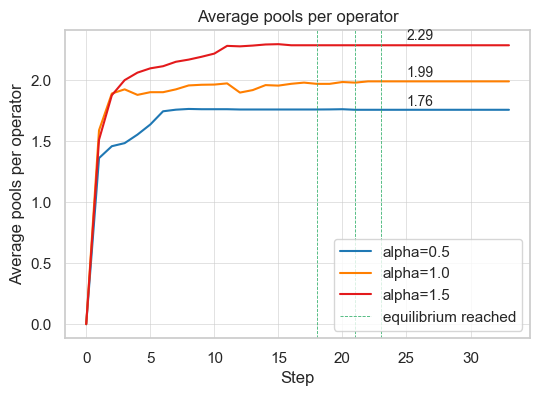

In [175]:
plot_sns_with_dataframe_three(pd_alpha_5,pd_alpha_10,pd_alpha_15,'alpha=0.5','alpha=1.0','alpha=1.5','Average pools per operator','Average pools per operator alpha')

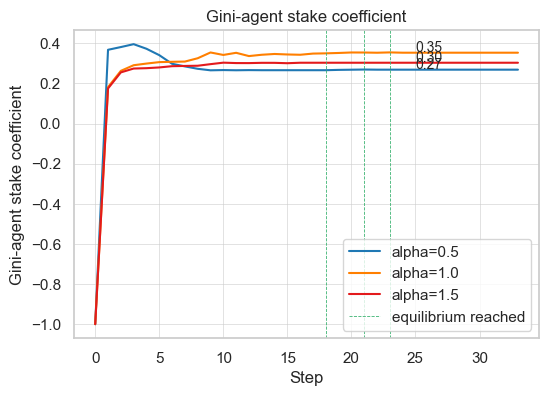

In [177]:
plot_sns_with_dataframe_three(pd_alpha_5,pd_alpha_10,pd_alpha_15,'alpha=0.5','alpha=1.0','alpha=1.5','Gini-agent stake coefficient','Gini-agent stake coefficient alpha')

In [184]:
#drop where gini-agent stake coefficient is below 0.0
pd_alpha_5=pd_alpha_5[pd_alpha_5['Gini-agent stake coefficient']>=0.0]
pd_alpha_10=pd_alpha_10[pd_alpha_10['Gini-agent stake coefficient']>=0.0]
pd_alpha_15=pd_alpha_15[pd_alpha_15['Gini-agent stake coefficient']>=0.0]

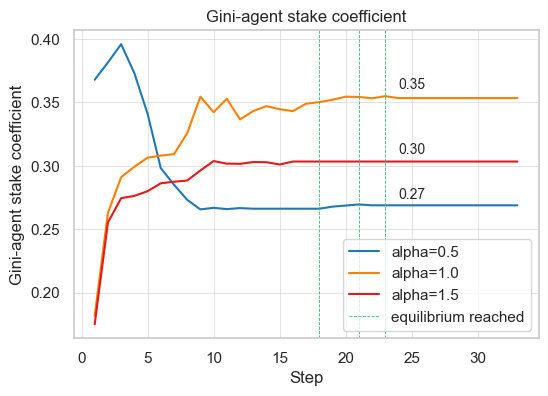

In [185]:
plot_sns_with_dataframe_three(pd_alpha_5,pd_alpha_10,pd_alpha_15,'alpha=0.5','alpha=1.0','alpha=1.5','Gini-agent stake coefficient','Gini-agent stake coefficient alpha')

In [3]:
import pandas as pd
df_baseline=pd.read_csv('304-n-1000-beta-2.0-alpha-1.0-stake_distr_source-pareto-agent_profile-hard/metrics.csv')

In [5]:
df_baseline.head()

,Round,Pool count,Total delegated stake,Total pool stake,Total insurance,Operator count,Average pools per operator,Nakamoto coefficient,HHI,Gini-agent stake coefficient,Total cost
0,0,"{'solo': 0, 'liquid': 0, 'total': 0}",0.000000,"{'solo': 0, 'liquid': 0, 'total': 0}",0.00000,"{'solo': 0, 'liquid': 0, 'total': 0}",0.000000,0,0.000000,-1.000000,"{'solo': 0, 'liquid': 0, 'total': 0}"
1,1,"{'solo': 39, 'liquid': 247, 'total': 286}",0.370061,"{'solo': 0.06284643735510681, 'liquid': 0.4935...",0.01235,"{'solo': 39, 'liquid': 141, 'total': 180}",1.588889,70,0.006270,0.181701,"{'solo': 0.021096629694432028, 'liquid': 0.082..."
2,2,"{'solo': 70, 'liquid': 240, 'total': 310}",0.359888,"{'solo': 0.12361932531772982, 'liquid': 0.4798...",0.01200,"{'solo': 70, 'liquid': 115, 'total': 164}",1.890244,54,0.007541,0.262962,"{'solo': 0.04314284569356661, 'liquid': 0.0699..."
3,3,"{'solo': 87, 'liquid': 244, 'total': 331}",0.361500,"{'solo': 0.15549828289036602, 'liquid': 0.4835...",0.01220,"{'solo': 81, 'liquid': 110, 'total': 172}",1.924419,52,0.007585,0.291024,"{'solo': 0.05658636407419043, 'liquid': 0.0658..."
4,4,"{'solo': 95, 'liquid': 247, 'total': 342}",0.370500,"{'solo': 0.17590452406191984, 'liquid': 0.4940...",0.01235,"{'solo': 88, 'liquid': 111, 'total': 182}",1.879121,53,0.007458,0.299235,"{'solo': 0.06337553121395109, 'liquid': 0.0635..."


In [12]:
def select_key(df,key,column):
    df2=[]
    for item in df[column]:
        item=eval(item)[key]
        df2.append(item)
    df2=pd.DataFrame(df2)
    df2=df2.rename(columns={0:key})
    return df2

new_df=pd.DataFrame()
new_df['cost_total']=select_key(df=df_baseline,key='total',column='Total cost')
new_df['cost_liquid']=select_key(df=df_baseline,key='liquid',column='Total cost')
new_df['cost_solo']=select_key(df=df_baseline,key='solo',column='Total cost')
new_df['total_pool']=select_key(df=df_baseline,key='total',column='Pool count')
new_df['liquid_pool']=select_key(df=df_baseline,key='liquid',column='Pool count')
new_df['solo_pool']=select_key(df=df_baseline,key='solo',column='Pool count')


In [13]:
new_df

,cost_total,cost_liquid,cost_solo,total_pool,liquid_pool,solo_pool
0,0.000000,0.000000,0.000000,0,0,0
1,0.103355,0.082259,0.021097,286,247,39
2,0.113079,0.069936,0.043143,310,240,70
3,0.122459,0.065873,0.056586,331,244,87
4,0.126966,0.063591,0.063376,342,247,95
5,0.135409,0.066929,0.068480,346,248,98
6,0.135898,0.065626,0.070272,346,246,100
7,0.137618,0.066161,0.071457,356,255,101
8,0.134957,0.061311,0.073646,360,257,103
9,0.136203,0.055603,0.080600,361,248,113


In [18]:
#calculate the average cost per pool
new_df['total']=new_df['cost_total']/new_df['total_pool']
new_df['liquid']=new_df['cost_liquid']/new_df['liquid_pool']
new_df['solo']=new_df['cost_solo']/new_df['solo_pool']
new_df


,cost_total,cost_liquid,cost_solo,total_pool,liquid_pool,solo_pool,total_per,liquid_per,solo_per,total,liquid,solo
0,0.000000,0.000000,0.000000,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,0.103355,0.082259,0.021097,286,247,39,0.000361,0.000333,0.000541,0.000361,0.000333,0.000541
2,0.113079,0.069936,0.043143,310,240,70,0.000365,0.000291,0.000616,0.000365,0.000291,0.000616
3,0.122459,0.065873,0.056586,331,244,87,0.000370,0.000270,0.000650,0.000370,0.000270,0.000650
4,0.126966,0.063591,0.063376,342,247,95,0.000371,0.000257,0.000667,0.000371,0.000257,0.000667
5,0.135409,0.066929,0.068480,346,248,98,0.000391,0.000270,0.000699,0.000391,0.000270,0.000699
6,0.135898,0.065626,0.070272,346,246,100,0.000393,0.000267,0.000703,0.000393,0.000267,0.000703
7,0.137618,0.066161,0.071457,356,255,101,0.000387,0.000259,0.000707,0.000387,0.000259,0.000707
8,0.134957,0.061311,0.073646,360,257,103,0.000375,0.000239,0.000715,0.000375,0.000239,0.000715
9,0.136203,0.055603,0.080600,361,248,113,0.000377,0.000224,0.000713,0.000377,0.000224,0.000713


In [30]:
def plot_sns_with_dataframe_three_2(df1,label1,label2,label3,metrix,title):
    df1_1=df1[[label1]]
    df2_1=df1[[label2]]
    df3_1=df1[[label3]]
    equilibrium_steps=[df1_1.index[-1]-10,df2_1.index[-1]-10,df3_1.index[-1]-10] # the step where equilibrium reached
    df = pd.concat([df1_1, df2_1,df3_1], axis=1)
    df.columns = [label1,label2,label3]
    df =df.fillna(method='ffill')
    equilibrium=df.iloc[-1]
    sns.set(style="whitegrid")  # 设置 Seaborn 样式
    sns.set_context("notebook", rc={"grid.linewidth": 0.4, "grid.alpha": 0.4,"grid.dashes": (1, 1)})  # 调整网格样式和间距
    color=sns.color_palette('Paired')
    equilibrium_colour = 'mediumseagreen'
    plt.figure(figsize=(7, 5))

    #plot two lines
    sns.lineplot(x=df[label1].index,y=df[label1],label=label1,color=color[1])
    sns.lineplot(x=df[label2].index,y=df[label2],label=label2,color=color[7])
    sns.lineplot(x=df[label3].index,y=df[label3],label=label3,color=color[5])
    #plot the value of equilibrium
    plt.text(len(df[label1]) - 9,equilibrium[0] * (1 + 0.02), f'{equilibrium[0]:.6f}', fontsize=10)
    plt.text(len(df[label2]) - 9,equilibrium[1] * (1 + 0.02), f'{equilibrium[1]:.6f}', fontsize=10)
    plt.text(len(df[label3]) - 9,equilibrium[2] * (1 + 0.02), f'{equilibrium[2]:.6f}', fontsize=10)
    #plot the equilibrium reached step
    plt.axvline(x=equilibrium_steps[0], label="equilibrium reached", c=equilibrium_colour, linestyle='--',linewidth=0.6)
    plt.axvline(x=equilibrium_steps[1], c=equilibrium_colour, linestyle='--',linewidth=0.6)
    plt.axvline(x=equilibrium_steps[2], c=equilibrium_colour, linestyle='--',linewidth=0.6)

    plt.xlabel('Step')
    plt.ylabel(metrix)
    plt.title(metrix)
    plt.legend(loc='lower left')
    plt.savefig(title+'.png',dpi=300)
    plt.show()

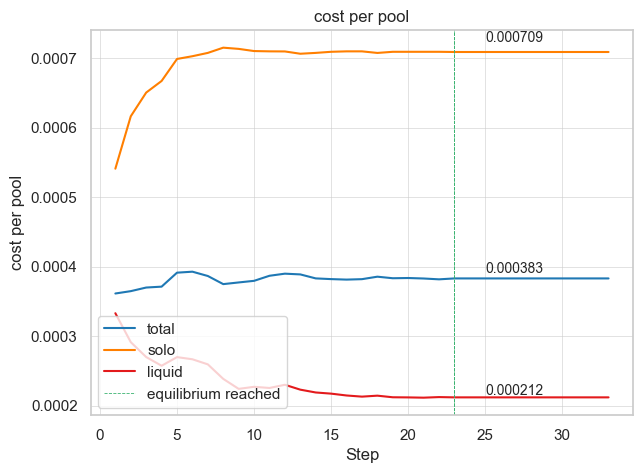

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
plot_sns_with_dataframe_three_2(new_df,'total','solo','liquid','cost per pool','cost_per_pool_baselines')